In [17]:
hb_data_all_3d.shape

(514, 52, 1251, 3)

In [ ]:
# modify get_nine_regions_hbo_mean_task_change




In [35]:
from utils.fnirs_utils import get_nine_region_data
from scipy.stats import zscore

def get_nine_regions_hbo_mean_task_change(hb_data_all):
    """ 
    Parameters: hb_data_all: shape (514, 9, 1251)
    
    outputs: 
    res: shape (514, 9, 2) -> (514, 18) -> normalize -> (514, 18)
    """
    
    hbo_index = 0
    HB = get_nine_region_data(hb_data_all[..., hbo_index])
    print(HB.shape)
    task_start_index = 100
    task_end_index = 700
    
    shape = HB.shape[0], HB.shape[1], 2            
    res = np.zeros(shape)
    for i in range(HB.shape[1]):    
        task_change_feature = HB[:, i, task_end_index:].mean(axis=1) - HB[:, i, :task_start_index].mean(axis=1)
        mean_feature = HB[:, i, :].mean(axis=1) 
        res[:, i, 0] = task_change_feature
        res[:, i, 1] = mean_feature
    
    res = res.reshape(res.shape[0], -1)
    normalized_res = zscore(res)    
    
    return res

: 

In [34]:
from scipy.stats import zscore

res = get_nine_regions_hbo_mean_task_change(hb_data_all_3d)


9
[array([ 8,  9, 19, 20]), array([ 0,  1, 10, 11]), array([ 6,  7, 16, 17, 18, 27, 28]), array([ 2,  3, 12, 13, 14, 23, 24]), array([29, 30, 40, 41, 50, 51]), array([21, 22, 31, 32, 42, 43]), array([38, 39, 48, 49]), array([33, 34, 44, 45]), array([ 4,  5, 15, 25, 26, 35, 36, 37, 46, 47])]
(514, 9, 1251)
(514, 9, 2)
(514, 18)


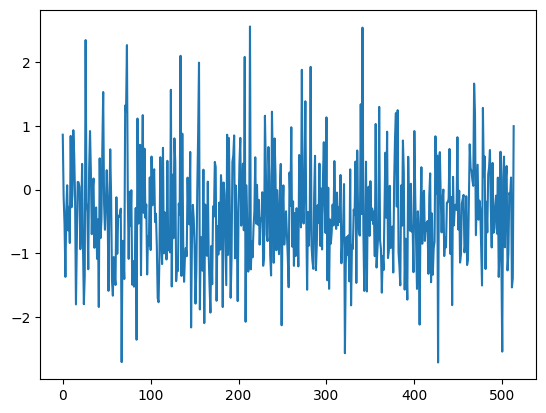

In [33]:
import matplotlib.pyplot as plt
plt.plot(normalized_res[:, 0])

In [21]:
HB = get_nine_region_data(hb_data_all_3d[..., 0])
print(HB.shape)

9
[array([ 8,  9, 19, 20]), array([ 0,  1, 10, 11]), array([ 6,  7, 16, 17, 18, 27, 28]), array([ 2,  3, 12, 13, 14, 23, 24]), array([29, 30, 40, 41, 50, 51]), array([21, 22, 31, 32, 42, 43]), array([38, 39, 48, 49]), array([33, 34, 44, 45]), array([ 4,  5, 15, 25, 26, 35, 36, 37, 46, 47])]
(514, 9, 1251)
